In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

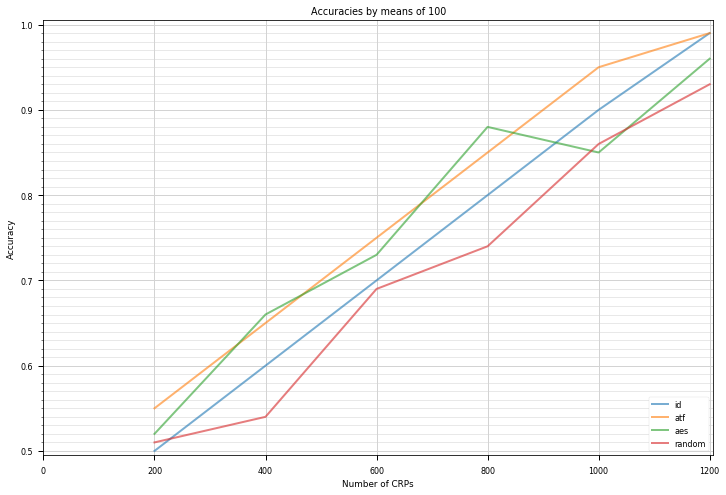

In [188]:
data = np.array([
    [.5, .6, .7, .8, .9, .99],
    [.55, .65, .75, .85, .95, .99],
    [.52, .66, .73, .88, .85, .96],
    [.51, .54, .69, .74, .86, .93]
])

names = ['id', 'atf', 'aes', 'random']
ticks = range(200, 1400, 200)
title = 'Accuracies by means of 100'
filename = 'trafo_comparison_k2_n64_max'

def plot_data(data, names, ticks, title, filename=None):
    num, N = np.shape(data)
    graphs = dict()
    fig, ax = plt.subplots(figsize=(12, 8))
    for i in range(num):
        graphs[i] = plt.plot(ticks, data[i], '-', linewidth=2.0, label=names[i], alpha=0.6)
    plt.grid(True)
    max_tick = max(ticks)
    ax.set_xlim([0, max_tick + (max_tick / 200)])
    ax.set_ylim([0.495, 1.005])
    ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
    ax.yaxis.set_minor_locator(plt.MultipleLocator(0.01))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(ticks[1] - ticks[0]))
    ax.tick_params(which='major', width=1.0, length=5)
    ax.tick_params(which='minor', width=0.5, length=2)
    ax.grid(b=True, which='major', color='lightgrey', linewidth=1)
    ax.grid(b=True, which='minor', color='lightgrey', linewidth=0.5)
    ax.legend(loc='lower right', framealpha=1)
    ax.set_xlabel('Number of CRPs')
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    if filename is not None:
        plt.savefig(fname=filename, dpi=500, quality=95)
    plt.show()
    return

plt.style.use('seaborn-paper')
plot_data(data, names, ticks, title)

In [3]:
def preprocess_data(path):
    df = np.array(pd.read_csv(path, sep='\t', header=None))
    ns = df[:, 2]
    ks = df[:, 3]
    nums = df[:, 4]
    accs = df[:, 5]
    transforms = df[:, 8]
    N = len(df)

    transforms_unique = np.unique(transforms)
    nums_unique = np.unique(nums)
    accuracies = list()   # list of lists for accuracies grouped by nums grouped by transforms
    for t in transforms_unique:
        accs_transform = list()
        indices_transform = transforms == t
        for num in nums_unique:
            indices_num = nums[indices_transform] == num
            accs_transform.append(accs[indices_transform][indices_num])
        accuracies.append(accs_transform)
    return accuracies, transforms_unique, nums_unique

In [197]:
k = 3
n = 64

path = 'cluster/trafos_k%i_n%i.log' % (k, n)
accs, trafos, nums = preprocess_data(path)

In [198]:
accs_mean = np.mean(np.array(accs), axis=2)
accs_max = np.max(np.array(accs), axis=2)
accs_min = np.min(np.array(accs), axis=2)

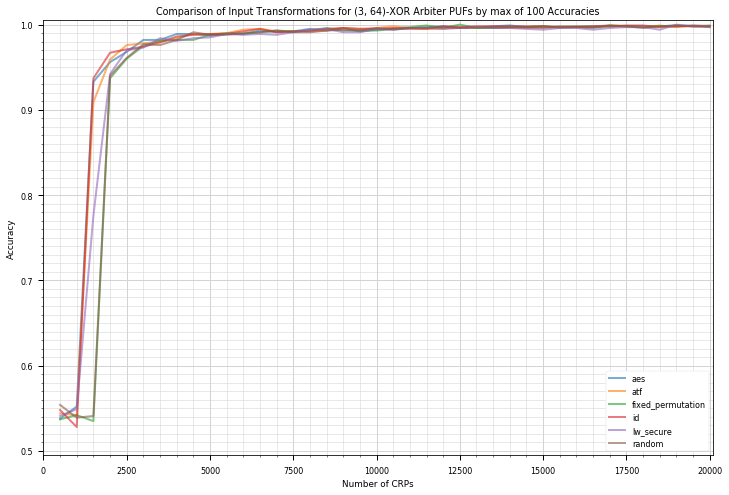

In [201]:
statistic = 'max'

title = 'Comparison of Input Transformations ' +\
        'for (%i, %i)-XOR Arbiter PUFs '  % (k, n) +\
        'by %s of 100 Accuracies' % statistic
filename = 'trafo_comparison_k%i_n%i_%s' % (k, n, statistic)

plt.style.use('seaborn-paper')
plot_data(accs_max, trafos, nums, title, filename)